In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

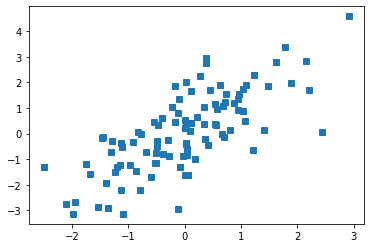

In [2]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x,y,'s')
plt.show()

In [29]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),     
    nn.Linear(1,1) 
    )

In [30]:
# model meta-parameters
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [31]:
train_percentage = 0.8
train_size = int(x.shape[0] * train_percentage)
train_size

80

In [32]:
# select training data (note the hard-coded N!)
trainidx  = np.random.choice(range(N),train_size,replace=False) # random indices
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [33]:
train_losses = []
test_losses = []

numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x[trainBool])
  predYtest = ANNreg(x[~trainBool])

  # compute loss
  loss = lossfun(yHat,y[trainBool])
  test_loss = lossfun(predYtest,y[~trainBool])

  train_losses.append(loss.item())
  test_losses.append(test_loss.item())

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

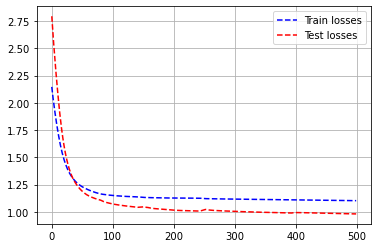

In [34]:
plt.plot(train_losses, 'b--', label='Train losses')
plt.plot(test_losses, 'r--', label='Test losses')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 1.10
Final TEST loss: 0.98


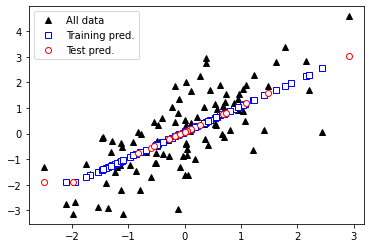

In [36]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()